In [83]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [84]:
df = pd.read_csv('new_data.csv')

In [85]:
df.head()

,Country,BCA,BCA_NGDPD,GGR_NGDP,GGXCNL_NGDP,GGXONLB_NGDP,GGXWDG_NGDP,GGX_NGDP,LP,NGDP,...,NGDP_D,NGDP_FY,NGDP_RPCH,NID_NGDP,PCPI,PCPIPCH,PPPGDP,PPPPC,TM_RPCH,TX_RPCH
0,Afghanistan,2.247,11.157,25.694,-2.243,-2.206,7.397,27.937,32.941,1547.290,...,120.050,1547.290,-2.351,16.462,120.671,5.607,80.912,2456.29,-2.925,0.534
1,Albania,-1.315,-8.677,25.905,-6.713,-4.621,75.927,32.619,2.878,1644.080,...,203.320,1644.080,-3.482,22.790,108.613,1.621,40.658,14128.00,-19.535,-27.549
2,Algeria,-18.711,-12.911,30.684,-11.959,-11.655,52.273,42.643,43.851,18383.800,...,256.869,18383.800,-5.100,41.852,211.180,2.415,497.030,11334.53,-18.943,-4.154
3,Andorra,0.422,14.634,40.485,-2.960,0.000,46.329,43.445,0.078,2.531,...,106.557,2.531,-11.184,0.000,102.298,0.257,4.092,52451.57,0.000,0.000
4,Angola,0.872,1.500,20.983,-1.898,4.944,136.540,22.882,31.031,33611.360,...,2293.820,33611.360,-5.750,24.953,431.227,22.277,212.172,6837.35,-33.037,-7.342


##### Data Split 1: viskas iš df, be scaling


In [86]:
# NGDPDPC - gdp_per_capita
y = df["NGDPDPC"]
X = df.drop(["NGDPDPC", "Country"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

##### Data Split 2: viskas iš df, su scaling


In [87]:
sc_X = StandardScaler()

X2_train = sc_X.fit_transform(X_train)
X2_test = sc_X.fit_transform(X_test)
y2_train = y_train
y2_test = y_test

##### Data Split 3: pasirinkti feature , be scaling

In [88]:
y3 = y
X3 = df.drop(
    [
        "NGDPDPC",
        "BCA",
        "Country",
        "GGR_NGDP",
        "GGXCNL_NGDP",
        "GGXONLB_NGDP",
        "GGXWDG_NGDP",
        "GGX_NGDP",
        "LP",
        "NGDP",
        "NGDPD",
        "PPPPC",
    ],
    axis=1,
)

X3_train, X3_test, y3_train, y3_test = train_test_split(
    X3, y3, test_size=0.2, random_state=42
)

##### Data Split 4: pasirinkti feature, su scaling

In [89]:
sc_X4 = StandardScaler()

X4_train = sc_X4.fit_transform(X3_train)
X4_test = sc_X4.fit_transform(X3_test)
y4_train = y3_train
y4_test = y3_test

## Random Forest

##### Modelio treniravimas

In [90]:
rf1 = RandomForestRegressor(random_state=42, n_estimators=100)
rf3 = RandomForestRegressor(random_state=42, n_estimators=100)

rf1.fit(X_train, y_train)
rf3.fit(X3_train, y3_train)

RandomForestRegressor(random_state=42)

In [91]:
rf1_pred = rf1.predict(X_test)
rf3_pred = rf3.predict(X3_test)

In [92]:
print('Random Forest Performance:')

print('\nall features, without scaling:')
print('MAE:', metrics.mean_absolute_error(y_test, rf1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf1_pred)))
print('R2_Score: ', metrics.r2_score(y_test, rf1_pred))

print('\nselected features, be scaling:')
print('MAE:', metrics.mean_absolute_error(y3_test, rf3_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y3_test, rf3_pred)))
print('R2_Score: ', metrics.r2_score(y3_test, rf3_pred))

Random Forest Performance:

all features, without scaling:
MAE: 3996.071029999999
RMSE: 8566.142557515599
R2_Score:  0.7936244695414008

selected features, be scaling:
MAE: 4051.5921774358953
RMSE: 9154.064109251196
R2_Score:  0.7643239196752718


#### Optimizacija 

Bus optimizuoti šie parametrai 

1. n-estimators 
2. min_samples_leaf
3. max_features
4. bootstrap

In [93]:
rf_param_grid = {'max_features': ['sqrt', 'auto'],
              'min_samples_leaf': [1, 5, 10],
              'n_estimators': [50, 500, 1000],
             'bootstrap': [False, True]} 

In [94]:
rf_grid = GridSearchCV(estimator= RandomForestRegressor(), param_grid = rf_param_grid,  n_jobs=-1, verbose=0)

In [95]:
rf_grid.fit(X_train,y_train)

C:\Users\Julius\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [False, True],
                         'max_features': ['sqrt', 'auto'],
                         'min_samples_leaf': [1, 5, 10],
                         'n_estimators': [50, 500, 1000]})

In [96]:
rf_grid.best_params_

{'bootstrap': True,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'n_estimators': 1000}

In [63]:
rf_grid.best_estimator_

RandomForestRegressor(max_features='auto', min_samples_leaf=5, n_estimators=500)

In [64]:
rf_grid_predictions = rf_grid.predict(X_test)

In [65]:
#rf_grid_predictions = rf_grid.predict(X_train) #

In [66]:
print('MAE:', metrics.mean_absolute_error(y_test, rf_grid_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf_grid_predictions)))
print('R2_Score: ', metrics.r2_score(y_test, rf_grid_predictions))

MAE: 4064.029232738753
RMSE: 8414.257727512806
R2_Score:  0.8008780082086563


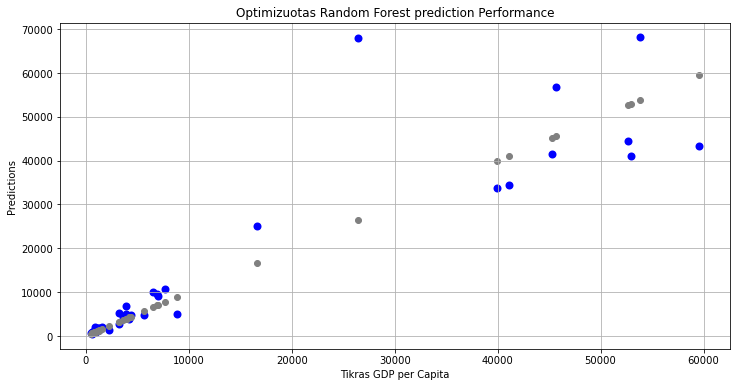

In [97]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(y_test,rf_grid_predictions, linewidths=2, edgecolors='b', color='blue')
plt.scatter(y_test, y_test, color='grey')
plt.xlabel('Tikras GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('Optimizuotas Random Forest prediction Performance') 
plt.grid()
plt.show()

